In [74]:
# GENERAL PACKAGE IMPORT
# ----------------------
import sys
sys.path.append('/Users/huangwp/Documents/git/HIL-Sim/flexlab/db_layer') 
from db_interface import DB_Interface
import requests
import numpy as np
import json
import pandas as pd
from pandas import DataFrame
from io import StringIO

import datetime as dt
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.dates import date2num
import seaborn
import timeit
import json
import pickle

import matplotlib.pyplot as plt
#import oa_temp as oa
#import sa_temp as sa
import db_plotting

In [75]:
#data24_original = pd.read_csv('data24_revised.csv', parse_dates = True, index_col = 0)
#data24 = pd.read_csv('FlexlabX1aNoLeakBaseline0907 (0901-0907).csv', parse_dates = True)
data24 = pd.read_csv('FlexlabX1aNoLeakBaseline1202.csv', parse_dates = True)

data25 = pd.read_csv('data24_revised.csv', parse_dates = True, index_col = 0)
day_range=[9,1,8]

In [76]:
data24["datetime"]=pd.to_datetime(data24["time"], unit='s',origin='2021-01-01') # change cumulative data to the "date" format

In [77]:
data24['datetime'] = pd.to_datetime(data24['datetime'])
data25['datetime'] = pd.to_datetime(data25['datetime'])

data24=data24.set_index('datetime')

In [78]:
data24.dtypes

Unnamed: 0                                     int64
time                                         float64
AHU: MAT                                     float64
AHU: RAT                                     float64
VAV: Core Zone Discharge Air Temperature     float64
VAV: North Zone Discharge Air Temperature    float64
VAV: South Zone Discharge Air Temperature    float64
VAV: Core Zone Airflow Rate                  float64
VAV: North Zone Airflow Rate                 float64
VAV: South Zone Airflow Rate                 float64
Outdoor Air Temperature                      float64
VAV: Core Zone Room Air Temperature          float64
VAV: Core Zone Damper Control Signal         float64
VAV: North Zone Room Air Temperature         float64
Tcool_SP                                     float64
Theat_SP                                     float64
VAV: North Zone Damper Control Signal        float64
VAV: South Zone Room Air Temperature         float64
VAV: South Zone Damper Control Signal        f

In [79]:
print(data24)

                     Unnamed: 0        time   AHU: MAT  AHU: RAT  \
datetime                                                           
2021-08-21 01:00:00           0  20048400.0  57.920044  66.17605   
2021-08-21 01:02:00           3  20048520.0  57.920044  66.10678   
2021-08-21 01:04:00           5  20048640.0  57.920044  66.07173   
2021-08-21 01:05:00           7  20048700.0  57.920044  66.03795   
2021-08-21 01:06:00           8  20048760.0  57.920044  66.00439   
...                         ...         ...        ...       ...   
2021-09-07 23:54:00       31146  21599640.0  68.657310  69.21025   
2021-09-07 23:55:00       31147  21599700.0  68.673020  69.21459   
2021-09-07 23:56:00       31148  21599760.0  68.688950  69.21893   
2021-09-07 23:58:00       31151  21599880.0  68.690216  69.19168   
2021-09-08 00:00:00       31154  21600000.0  68.721970  69.20091   

                     VAV: Core Zone Discharge Air Temperature  \
datetime                                          

In [80]:
print(data25)

                     desk1_plug_power  desk2_plug_power  desk3_plug_power  \
time                                                                        
2021-08-21 23:45:00               NaN               NaN               NaN   
2021-08-22 00:00:00         34.368807          8.110353         33.999160   
2021-08-22 00:15:00         34.342453          8.079440         34.717233   
2021-08-22 00:30:00         33.950807          7.960120         34.402620   
2021-08-22 00:45:00         34.398967          8.103993         34.550567   
...                               ...               ...               ...   
2021-09-08 22:45:00         34.714160          7.995847         34.537033   
2021-09-08 23:00:00         34.192893          7.942653         34.044000   
2021-09-08 23:15:00         34.062833          8.218353         34.730773   
2021-09-08 23:30:00         35.027853          7.984933         34.653393   
2021-09-08 23:45:00         33.986587          7.903553         34.726673   

In [81]:
print(data24[['AHU: Cooling coil Load','Outdoor Air Temperature']].head(50))

                     AHU: Cooling coil Load  Outdoor Air Temperature
datetime                                                            
2021-08-21 01:00:00           -2.709269e-06                57.919990
2021-08-21 01:02:00           -3.849032e-06                57.919990
2021-08-21 01:04:00           -2.636470e-06                57.919990
2021-08-21 01:05:00           -2.932371e-06                57.919990
2021-08-21 01:06:00           -3.711714e-06                57.919990
2021-08-21 01:08:00           -2.540616e-06                57.919990
2021-08-21 01:10:00           -3.572613e-06                57.919990
2021-08-21 01:12:00           -2.421279e-06                57.919990
2021-08-21 01:14:00           -3.438798e-06                57.919990
2021-08-21 01:15:00           -2.699786e-06                57.919990
2021-08-21 01:16:00           -2.304247e-06                57.919990
2021-08-21 01:18:00           -3.313123e-06                57.919990
2021-08-21 01:20:00           -2.1

In [82]:
#data24['AHU:Cooling Coil Load']=data24['AHU:Cooling Coil Load'].resample('15T', label='right', closed='right').mean() 
data24['AHU: Cooling coil Load']=data24['AHU: Cooling coil Load'].resample('15T', label='right', closed='right').mean() 
data24['AHU: Supply Fan Power']=data24['AHU: Supply Fan Power'].resample('15T', label='right', closed='right').mean() 
 



data24=data24.resample('15T').asfreq()


# I process data to 15 min interval so that the temperature dataset takes current time value
# but energy dataset takes mean value in the past 15 min
# in order to agree with FLEXLAB test data processing


In [83]:
print(data24[['AHU: Cooling coil Load','Outdoor Air Temperature']].head(50))

                     AHU: Cooling coil Load  Outdoor Air Temperature
datetime                                                            
2021-08-21 01:00:00           -2.709269e-06                57.919990
2021-08-21 01:15:00           -3.089187e-06                57.919990
2021-08-21 01:30:00           -1.746978e-06                57.919990
2021-08-21 01:45:00           -1.631427e-05                57.919990
2021-08-21 02:00:00           -1.700000e-05                57.919990
2021-08-21 02:15:00           -1.137672e-01                57.891860
2021-08-21 02:30:00           -2.686695e-01                57.830010
2021-08-21 02:45:00           -2.777121e-01                57.768158
2021-08-21 03:00:00           -1.386757e-01                57.740032
2021-08-21 03:15:00           -1.142656e-03                57.740032
2021-08-21 03:30:00           -1.289450e-05                57.740032
2021-08-21 03:45:00           -8.607115e-07                57.740032
2021-08-21 04:00:00            3.6

In [84]:



data24['datetime']=data24.index
data24['1B-OAT-1']=data24['Outdoor Air Temperature']
# add these columns so that later analysis codes don't return an error

In [85]:
print(data24.isnull().sum())   # normal if everything is zero

Unnamed: 0                                   0
time                                         0
AHU: MAT                                     0
AHU: RAT                                     0
VAV: Core Zone Discharge Air Temperature     0
VAV: North Zone Discharge Air Temperature    0
VAV: South Zone Discharge Air Temperature    0
VAV: Core Zone Airflow Rate                  0
VAV: North Zone Airflow Rate                 0
VAV: South Zone Airflow Rate                 0
Outdoor Air Temperature                      0
VAV: Core Zone Room Air Temperature          0
VAV: Core Zone Damper Control Signal         0
VAV: North Zone Room Air Temperature         0
Tcool_SP                                     0
Theat_SP                                     0
VAV: North Zone Damper Control Signal        0
VAV: South Zone Room Air Temperature         0
VAV: South Zone Damper Control Signal        0
AHU: Cooling coil Load                       0
VAV:Core zone Q                              0
AHU: Outdoor 

In [86]:
data24['date'] = data24['datetime'].apply(lambda x: datetime.date(x.year, x.month, x.day))
data24['time'] = data24['datetime'].apply(lambda x: datetime.time(x.hour, x.minute, x.second))

data25['date'] = data25['datetime'].apply(lambda x: datetime.date(x.year, x.month, x.day))
data25['time'] = data25['datetime'].apply(lambda x: datetime.time(x.hour, x.minute, x.second))

In [87]:
baseline_day_mask = (data25['date'] >= datetime.date(2021, 8, 21)) & (data25['date'] <= datetime.date(2021, 8, 21))
test_day_mask24=(data24['date'] >= datetime.date(2021, day_range[0], day_range[1])) & (data24['date'] <= datetime.date(2021, day_range[0], day_range[2]))
test_day_mask25=(data25['date'] >= datetime.date(2021, day_range[0], day_range[1])) & (data25['date'] <= datetime.date(2021, day_range[0], day_range[2]))

In [88]:

data_baseline0=data25[baseline_day_mask]
data24 = data24[test_day_mask24]
data25 = data25[test_day_mask25]

In [89]:
data_baseline0A=data_baseline0.copy(deep=True)
data_baseline0B=data_baseline0.copy(deep=True)
data_baseline0A.index=data_baseline0A.index+pd.to_timedelta(7,unit='d')

data_baseline0B.index=data_baseline0B.index+pd.to_timedelta(8,unit='d')
data_baseline = data_baseline0A.append(data_baseline0B)
#data_baseline = data_baseline0A

In [90]:
data24['precool_window'] = 0
data24['gta_window'] = 0

data25['precool_window'] = 0
data25['gta_window'] = 0

precool_st = datetime.time(10,0,0)
precool_en = datetime.time(14,0,0)

gta_st = datetime.time(14,0,0)
gta_en = datetime.time(18,0,0)

#print(type(data24['datetime'].iloc[0]))
#print(type(datetime.time(14,0,0)))


#gta_ts24 = (data24['time'] > gta_st) & (data24['time'] <= gta_en)
#precool_ts24 = (data24['time'] > precool_st) & (data24['time'] <= precool_en)
gta_ts = (data25['time'] > gta_st) & (data25['time'] <= gta_en)
precool_ts = (data25['time'] > precool_st) & (data25['time'] <= precool_en)

#print(gta_ts)
data24['precool_window'][precool_ts] = 1
data24['gta_window'][gta_ts] = 1

data25['precool_window'][precool_ts] = 1
data25['gta_window'][gta_ts] = 1

print(data24['gta_window'][gta_ts])
print(data25['gta_window'][gta_ts])

datetime
2021-09-01 14:15:00    1
2021-09-01 14:30:00    1
2021-09-01 14:45:00    1
2021-09-01 15:00:00    1
2021-09-01 15:15:00    1
                      ..
2021-09-07 17:00:00    1
2021-09-07 17:15:00    1
2021-09-07 17:30:00    1
2021-09-07 17:45:00    1
2021-09-07 18:00:00    1
Name: gta_window, Length: 112, dtype: int64
time
2021-09-01 14:15:00    1
2021-09-01 14:30:00    1
2021-09-01 14:45:00    1
2021-09-01 15:00:00    1
2021-09-01 15:15:00    1
                      ..
2021-09-08 17:00:00    1
2021-09-08 17:15:00    1
2021-09-08 17:30:00    1
2021-09-08 17:45:00    1
2021-09-08 18:00:00    1
Name: gta_window, Length: 128, dtype: int64


/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_1534/851995363.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data24['precool_window'][precool_ts] = 1
/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_1534/851995363.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data24['gta_window'][gta_ts] = 1
/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_1534/851995363.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [91]:
data24['date']

datetime
2021-09-01 00:00:00    2021-09-01
2021-09-01 00:15:00    2021-09-01
2021-09-01 00:30:00    2021-09-01
2021-09-01 00:45:00    2021-09-01
2021-09-01 01:00:00    2021-09-01
                          ...    
2021-09-07 23:00:00    2021-09-07
2021-09-07 23:15:00    2021-09-07
2021-09-07 23:30:00    2021-09-07
2021-09-07 23:45:00    2021-09-07
2021-09-08 00:00:00    2021-09-08
Freq: 15T, Name: date, Length: 673, dtype: object

In [92]:
print(data24.columns)
print(data25.columns)
#print(data24_original.columns)

Index(['Unnamed: 0', 'time', 'AHU: MAT', 'AHU: RAT',
       'VAV: Core Zone Discharge Air Temperature',
       'VAV: North Zone Discharge Air Temperature',
       'VAV: South Zone Discharge Air Temperature',
       'VAV: Core Zone Airflow Rate', 'VAV: North Zone Airflow Rate',
       'VAV: South Zone Airflow Rate', 'Outdoor Air Temperature',
       'VAV: Core Zone Room Air Temperature',
       'VAV: Core Zone Damper Control Signal',
       'VAV: North Zone Room Air Temperature', 'Tcool_SP', 'Theat_SP',
       'VAV: North Zone Damper Control Signal',
       'VAV: South Zone Room Air Temperature',
       'VAV: South Zone Damper Control Signal', 'AHU: Cooling coil Load',
       'VAV:Core zone Q', 'AHU: Outdoor Air Damper Position',
       'AHU: Supply Fan Power', 'AHU: Supply Fan Airflow Rate',
       'AHU: Cooling Coil Control Signal', 'VAV:North zone Q',
       'VAV:South zone Q', 'datetime', '1B-OAT-1', 'date', 'precool_window',
       'gta_window'],
      dtype='object')
Index(['desk1

In [93]:
print(data24)

                     Unnamed: 0      time   AHU: MAT   AHU: RAT  \
datetime                                                          
2021-09-01 00:00:00       19018  00:00:00  56.300490  66.464935   
2021-09-01 00:15:00       19035  00:15:00  56.169870  66.195000   
2021-09-01 00:30:00       19052  00:30:00  56.026930  65.940280   
2021-09-01 00:45:00       19071  00:45:00  55.885757  65.717040   
2021-09-01 01:00:00       19088  01:00:00  55.760513  65.507645   
...                         ...       ...        ...        ...   
2021-09-07 23:00:00       31079  23:00:00  68.582660  69.550550   
2021-09-07 23:15:00       31097  23:15:00  68.496520  69.444640   
2021-09-07 23:30:00       31114  23:30:00  68.507230  69.342360   
2021-09-07 23:45:00       31135  23:45:00  68.596886  69.265400   
2021-09-08 00:00:00       31154  00:00:00  68.721970  69.200910   

                     VAV: Core Zone Discharge Air Temperature  \
datetime                                                       

In [94]:
print(data25)

                     desk1_plug_power  desk2_plug_power  desk3_plug_power  \
time                                                                        
2021-09-01 00:00:00         34.382007          8.081347         34.508060   
2021-09-01 00:15:00         34.664187          8.095553         34.399413   
2021-09-01 00:30:00         33.989600          7.988420         34.540873   
2021-09-01 00:45:00         34.123913          8.033287         34.875240   
2021-09-01 01:00:00         33.898013          8.055407         34.453893   
...                               ...               ...               ...   
2021-09-08 22:45:00         34.714160          7.995847         34.537033   
2021-09-08 23:00:00         34.192893          7.942653         34.044000   
2021-09-08 23:15:00         34.062833          8.218353         34.730773   
2021-09-08 23:30:00         35.027853          7.984933         34.653393   
2021-09-08 23:45:00         33.986587          7.903553         34.726673   

### Metrics

In [95]:
data24 = data24.assign(COP='COP') 
#data24['COP'] = data24['oat_C'].apply(lambda x: (0.548 + 0.0951*x + (-7.63E-04)*x**2))
data24['COP'] = 2.9

data25 = data25.assign(COP='COP') 
#data25['COP'] = data25['oat_C'].apply(lambda x: (0.548 + 0.0951*x + (-7.63E-04)*x**2))
data25['COP'] = 2.9

In [97]:
data24 = data24.assign(chiller = 'Chiller_load') 
data24['Chiller_load'] = (data24['AHU: Cooling coil Load']/data24['COP'])*1
#data24['cooling_power [W]'] = data24['1A-El-AHU'] + data24['1A-El-Exhaust Fan'] + data24['1A-El-CHWP'] + data24['Chiller_load']

# if change to 1/1.225, can comment out the first 2 lines
data24['AHU: Supply Fan Airflow Rate']=data24['AHU: Supply Fan Airflow Rate'].apply(lambda x: (x/1.225/1.225))
data24['AHU: Supply Fan Airflow Rate']=data24['AHU: Supply Fan Airflow Rate'].apply(lambda x: (x/2118.8))
data24['AHU: Supply Fan Power']=data24['AHU: Supply Fan Airflow Rate'].apply(lambda x: (-391*x**2+687*x+140))

data24['cooling_power [W]'] = data24['AHU: Supply Fan Power']   + data24['Chiller_load']

data25 = data25.assign(chiller = 'Chiller_load') 
data25['Chiller_load'] = (data25['1A-Th-Chilled Water']/data25['COP'])*-1
#data25['cooling_power [W]'] = data25['1B-El-AHU'] + data25['1B-El-Exhaust Fan'] + data25['1B-El-CHWP'] + data25['Chiller_load']
data25['cooling_power [W]'] = data25['1A-El-AHU'] +  data25['Chiller_load']

In [ ]:
#print(data24[['AHU: Supply Fan Airflow Rate','AHU: Supply Fan Power']].head(50))

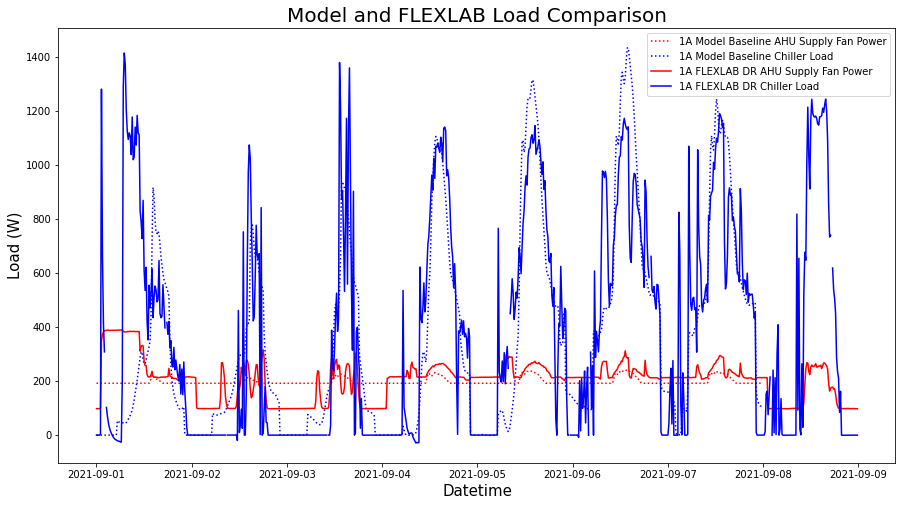

In [98]:
#data24['AHU: Supply Fan Power'].plot(kind='line',figsize=(15,8),legend=True)
#data24['Chiller_load'].plot(kind='line',figsize=(15,8),legend=True)
#data25['1B-El-AHU'].plot(kind='line',figsize=(15,8),legend=True)
#data25['Chiller_load'].plot(kind='line',figsize=(15,8),legend=True)





#plt.show()



fig,ax_left=plt.subplots()

fig.set_size_inches(15, 8)

lns1=ax_left.plot(data24.index,data24['AHU: Supply Fan Power'],'r:',label="1A Model Baseline AHU Supply Fan Power")
lns2=ax_left.plot(data24.index,data24['Chiller_load'],'b:', label="1A Model Baseline Chiller Load")
lns3=ax_left.plot(data25.index,data25['1A-El-AHU'],'r-', label="1A FLEXLAB DR AHU Supply Fan Power")
lns4=ax_left.plot(data25.index,data25['Chiller_load'],'b-', label="1A FLEXLAB DR Chiller Load")
plt.title('Model and FLEXLAB Load Comparison',fontsize=20)
ax_left.set_xlabel('Datetime',fontsize=15)
ax_left.set_ylabel('Load (W)',fontsize=15)

lns=lns1+lns2+lns3+lns4
labs=[l.get_label() for l in lns]
ax_left.legend(lns,labs,bbox_to_anchor=(1, 1),loc=1,fontsize=10)
#ax_left.set_ylim([50,68.3])
#ax_right.set_ylim([-0.1,2.4])
plt.show()

In [ ]:
#data24['AHU: Supply Fan Power'].plot(kind='line',figsize=(15,8),legend=True)
#data24['Chiller_load'].plot(kind='line',figsize=(15,8),legend=True)
#data25['1B-El-AHU'].plot(kind='line',figsize=(15,8),legend=True)
#data25['Chiller_load'].plot(kind='line',figsize=(15,8),legend=True)





#plt.show()



fig,ax_left=plt.subplots()

fig.set_size_inches(15, 8)

lns1=ax_left.plot(data24.index,data24['AHU: Supply Fan Power'],'r-',label="1A Model Baseline AHU Supply Fan Power")
lns2=ax_left.plot(data24.index,data24['Chiller_load'],'b-', label="1A Model Baseline Chiller Load")
lns3=ax_left.plot(data25.index,data25['1A-El-AHU'],'r:', label="1A FLEXLAB DR AHU Supply Fan Power")
lns4=ax_left.plot(data25.index,data25['Chiller_load'],'b:', label="1A FLEXLAB DR Chiller Load")
lns5=ax_left.plot(data25.index,data25['1A-El-CHWP'],'g:', label="1A FLEXLAB DR CHWP Power")
lns6=ax_left.plot(data25.index,data25['1A-El-Exhaust Fan'],'g:', label="1A FLEXLAB DR Exhaust Fan Power")
lns7=ax_left.plot(data24.index,data24['VAV:South zone Q'],'g-', label="1A Model Baseline VAV:South zone Q")


plt.title('Model and FLEXLAB Load Comparison',fontsize=20)
ax_left.set_xlabel('Datetime',fontsize=15)
ax_left.set_ylabel('Load (W)',fontsize=15)

lns=lns1+lns2+lns3+lns4+lns5+lns6+lns7
labs=[l.get_label() for l in lns]
ax_left.legend(lns,labs,bbox_to_anchor=(1, 1),loc=1,fontsize=10)
#ax_left.set_ylim([50,68.3])
#ax_right.set_ylim([-0.1,2.4])
plt.show()

Index(['Unnamed: 0', 'time', 'AHU: MAT', 'AHU: RAT',
       'VAV: Core Zone Discharge Air Temperature',
       'VAV: North Zone Discharge Air Temperature',
       'VAV: South Zone Discharge Air Temperature',
       'VAV: Core Zone Airflow Rate', 'VAV: North Zone Airflow Rate',
       'VAV: South Zone Airflow Rate', 'Outdoor Air Temperature',
       'AHU: Supply Air Temperature', 'AHU: Outdoor Air Damper Position',
       'AHU: Return Air Damper Position',
       'VAV: Core Zone Room Air Temperature',
       'VAV: Core Zone Reheat Control Signal',
       'VAV: Core Zone Damper Control Signal',
       'VAV: North Zone Room Air Temperature',
       'VAV: North Zone Reheat Control Signal',
       'VAV: North Zone Damper Control Signal',
       'VAV: South Zone Room Air Temperature',
       'VAV: South Zone Reheat Control Signal',
       'VAV: South Zone Damper Control Signal', 'AHU:Cooling Coil Load',
       'AHU: Cooling coil Load', 'VAV:Core zone Q', 'AHU: Supply Fan Power',
       'AHU: Supply Fan Airflow Rate', 'VAV:North zone Q', 'VAV:South zone Q',
       'faulty', 'datetime', '1B-OAT-1', 'date', 'precool_window',
       'gta_window'],
      dtype='object')
Index(['desk1_plug_power', 'desk2_plug_power', 'desk3_plug_power',
       'desk4_plug_power', 'desk5_plug_power', 'desk6_plug_power',
       'desk3_light_power', 'desk4_light_power', 'desk2_light_power',
       'desk1_6_light_power', 'desk5_light_power', '1A-VAV1-Zn_Temp',
       '1A-VAV2-Zn_Temp', '1A-VAV3-Zn_Temp', '1A-VAV1-OccupiedCoolingSetpt',
       '1A-VAV1-UnoccupiedCoolingSetpt', '1A-VAV1-OccupiedHeatingSetpt',
       '1A-VAV1-UnoccupiedHeatingSetpt', '1A-VAV2-OccupiedCoolingSetpt',
       '1A-VAV2-UnoccupiedHeatingSetpt', '1A-VAV2-UnoccupiedCoolingSetpt',
       '1A-VAV2-OccupiedHeatingSetpt', '1A-VAV3-OccupiedCoolingSetpt',
       '1A-VAV3-UnoccupiedHeatingSetpt', '1A-VAV3-UnoccupiedCoolingSetpt',
       '1A-VAV3-OccupiedHeatingSetpt', '1A-El-AHU', '1A-El-CHWP', '1A-El-HWP',
       '1A-El-Exhaust Fan', '1A-Th-Chilled Water', '1B-OAT-1',
       '1A-MidZone-TCS6-DBT', '1A-NorthZone-DBT', '1A-WindowZone-TCS7-DBT',
       '1A-VAV1-DischargeAirTemp', '1A-VAV2-DischargeAirTemp',
       '1A-VAV3-DischargeAirTemp', '1A-VAV1-DischargeAirflow',
       '1A-VAV2-DischargeAirflow', '1A-VAV3-DischargeAirflow', '1A-ASAM-1',
       '1A-ARAM-1', '1A-SAT-1', '1A-OADA-1-POSN', '1A-RADA-1-POSN', 'datetime',
       'date', 'time', 'precool_window', 'gta_window'],
      dtype='object')

In [ ]:



en_1a = []
en_1b = []
# define dates for the calculation

#for day in range(15, 20):    
    #mask_1 = data24['date'] == datetime.date(2021, 9, day)

for day in range(day_range[1], day_range[2]+1):    
    mask_1 = data24['date'] == datetime.date(2021, day_range[0], day)
    print(day)
    day_en_1a = round((data24['cooling_power [W]'][mask_1].sum()/4000),2)
    en_1a.append(day_en_1a)
    
    day_en_1b = round((data25['cooling_power [W]'][mask_1].sum()/4000),2)
    #print(day_en_1b)
    en_1b.append(day_en_1b)
    
    
print(en_1a)
print(en_1b)


In [ ]:
db_plotting.energy_plot(data25, en_1a, en_1b, 'Daily Energy consumption (kWh)', 'Energy (kWh)')

### Shed

In [ ]:
#data25['G36 Demand Shed'] = data25['cooling_power [W]'] - data24['cooling_power [W]']

shed_1a = []
shed_1b = []
shed_oat = []
# define dates for the calculation

for day in range(day_range[1],day_range[2]+1):     
    mask_1 = data24['date'] == datetime.date(2021, day_range[0], day) # days in range,analyze by each day
    #print(day) 
    day_shed_1a = (data24['cooling_power [W]'][mask_1][gta_ts].mean())   # only select 2-6pm
    shed_1a.append(day_shed_1a)
    
    day_shed_1b = (data25['cooling_power [W]'][mask_1][gta_ts].mean())
    shed_1b.append(day_shed_1b)
    
    shed_oat_mean=(data24['1B-OAT-1'][mask_1][gta_ts].mean())  # outdoor air temperature average from 2-6pm
    
    shed_oat.append(shed_oat_mean) # make daily average temp a list



In [ ]:
data24['cooling_power [W]'][mask_1][gta_ts]

In [ ]:
#print(data25['G36 Demand Shed'][gta_ts])

In [ ]:
print(shed_1a)
db_plotting.shed_demand_plot(data25, shed_1a, shed_1b, 'Demand during GTA period', 'Demand (W)')

### SHIFT

In [ ]:
data25['G36 Demand shift'] = data25['cooling_power [W]'] - data24['cooling_power [W]']

precool_1a = []
precool_1b = []

# define dates for the calculation
for day in range(day_range[1],day_range[2]+1):    
    mask_1 = data25['date'] == datetime.date(2021, day_range[0], day)
    #print(mask_1) 
        
    day_precool_1a = (data24['cooling_power [W]'][mask_1][precool_ts].mean())
    precool_1a.append(day_precool_1a)
    print(day_precool_1a)
    day_precool_1b = (data25['cooling_power [W]'][mask_1][precool_ts].mean())
    precool_1b.append(day_precool_1b)
    


In [ ]:
print(precool_1a)
db_plotting.precool_demand_plot(data25, precool_1a, precool_1b, 'Demand during Precool period', 'Demand (W)')

### Thermal comfort

In [ ]:
fig, (ax1, ax) = plt.subplots(nrows = 2, ncols = 1, constrained_layout=True, facecolor='w', edgecolor='k',figsize = (16,9))
fig.subplots_adjust(hspace = .4, wspace=.15)

ax1.plot(data25['1A-VAV3-Zn_Temp'], label = 'South zone', color = 'skyblue')
ax1.plot(data25['1A-VAV2-Zn_Temp'], label = 'Core zone', color = 'red')
ax1.plot(data25['1A-VAV1-Zn_Temp'], label = 'North zone', color = 'green')
ax1.plot(data25['1A-VAV3-OccupiedCoolingSetpt'], color = 'grey', linewidth= 1, linestyle = 'dashed')
ax1.plot(data25['1A-VAV3-OccupiedHeatingSetpt'], color = 'grey', linewidth= 1, linestyle = 'dashed')

ax.plot(data24['VAV: South Zone Room Air Temperature'], label = 'South zone', color = 'skyblue')
ax.plot(data24['VAV: Core Zone Room Air Temperature'], label = 'Core zone', color = 'red')
ax.plot(data24['VAV: North Zone Room Air Temperature'], label = 'North zone', color = 'green')
ax.plot(data_baseline['1A-VAV3-OccupiedCoolingSetpt'], color = 'grey', linewidth= 1, linestyle = 'dashed')
ax.plot(data_baseline['1A-VAV3-OccupiedHeatingSetpt'], color = 'grey', linewidth= 1, linestyle = 'dashed')

ax1.set_ylabel('Zone Air Temperature (deg F)', fontsize = 12)
ax.set_ylabel('Zone Air Temperature (deg F)', fontsize = 12)

ax1.set_title('Cell A FLEXLAB: Zone Air Temperature', fontsize = 18)
ax.set_title('Cell A Model: Zone Air Temperature', fontsize = 18)

ax1.set_xlim([datetime.date(2021, day_range[0], day_range[1]),datetime.date(2021, day_range[0], day_range[2]+1)]) 
ax.set_xlim([datetime.date(2021, day_range[0], day_range[1]),datetime.date(2021, day_range[0], day_range[2]+1)])


ax1.set_ylim([59,81])
ax.set_ylim([59,81])   # add this additionally to prevent the plot from going off scale

ax.legend(fontsize = 9, loc = 4)
ax1.legend(fontsize = 9, loc = 4)

In [ ]:
data24 = data24.assign(nor_zat_deg = 'nor_zat_deg') 
#for i in range(len(data20.index)):

def zat_col(df_zat, df_cool_sp):
    df_zat = df_zat.apply(lambda x: (x-32)/1.8)
    df_cool_sp = df_cool_sp.apply(lambda x: (x-32)/1.8)
    
    df_zat_deg = df_zat - df_cool_sp
    df_zat_deg = df_zat_deg.apply(lambda x:0 if x <= 0 else x)
    return (df_zat_deg)

In [ ]:
data24['nor_zat_deg'] = zat_col(data24['VAV: North Zone Room Air Temperature'], data_baseline['1A-VAV1-OccupiedCoolingSetpt'])
data24['cor_zat_deg'] = zat_col(data24['VAV: Core Zone Room Air Temperature'], data_baseline['1A-VAV2-OccupiedCoolingSetpt'])
data24['sou_zat_deg'] = zat_col(data24['VAV: South Zone Room Air Temperature'], data_baseline['1A-VAV3-OccupiedCoolingSetpt'])
#data25['nor_zat_deg'] = zat_col(data25['1B-VAV1-Zn_Temp'], data24_original['1A-VAV1-OccupiedCoolingSetpt'])
#data25['cor_zat_deg'] = zat_col(data25['1B-VAV2-Zn_Temp'], data24_original['1A-VAV2-OccupiedCoolingSetpt'])
#data25['sou_zat_deg'] = zat_col(data25['1B-VAV3-Zn_Temp'], data24_original['1A-VAV3-OccupiedCoolingSetpt'])

data25['nor_zat_deg'] = zat_col(data25['1A-VAV1-Zn_Temp'], data25['1A-VAV1-OccupiedCoolingSetpt'])
data25['cor_zat_deg'] = zat_col(data25['1A-VAV2-Zn_Temp'], data25['1A-VAV2-OccupiedCoolingSetpt'])
data25['sou_zat_deg'] = zat_col(data25['1A-VAV3-Zn_Temp'], data25['1A-VAV3-OccupiedCoolingSetpt'])


print(data25['cor_zat_deg'].isnull().sum())  


#data22['nor_zat_deg'] = zat_col(data22['VAV: North Zone Room Air Temperature'], data22['Tcool_SP'])
#data22['cor_zat_deg'] = zat_col(data22['VAV: Core Zone Room Air Temperature'], data22['Tcool_SP'])
#data22['sou_zat_deg'] = zat_col(data22['VAV: South Zone Room Air Temperature'], data22['Tcool_SP'])

#data23['nor_zat_deg'] = zat_col(data23['VAV: North Zone Room Air Temperature'], data23['Tcool_SP'])
#data23['cor_zat_deg'] = zat_col(data23['VAV: Core Zone Room Air Temperature'], data23['Tcool_SP'])
#data23['sou_zat_deg'] = zat_col(data23['VAV: South Zone Room Air Temperature'], data23['Tcool_SP'])

#data24['nor_zat_deg'] = zat_col(data24['VAV: North Zone Room Air Temperature'], data24['Tcool_SP'])
#data24['cor_zat_deg'] = zat_col(data24['VAV: Core Zone Room Air Temperature'], data24['Tcool_SP'])
#data24['sou_zat_deg'] = zat_col(data24['VAV: South Zone Room Air Temperature'], data24['Tcool_SP'])

In [ ]:
#print(data20['nor_zat_deg'], data23['nor_zat_deg'])

In [ ]:
def calc_stats(df, df_temp):
   
    overshoot = []
    mean = []
    median = []
    std = []
    oc_st = datetime.time(7,0,0)
    oc_en = datetime.time(19,0,0)

    oc_time = ((df['time'] >= oc_st) & (df['time'] <= oc_en))

    #print(df_temp, df['Tcool_SP'])
        
    for day in range(day_range[1],day_range[2]+1):    
        mask_1 = data25['date'] == datetime.date(2021, day_range[0], day)
        daily_mean = df_temp[mask_1][oc_time].mean()
        daily_median = df_temp[mask_1][oc_time].median()
        #print('Variance', df[df[i] > target[i]].var())
        daily_std = df_temp[mask_1][oc_time].std()
        
        mean.append(daily_mean)
        median.append(daily_median)
        std.append(daily_std)
        
    #for i in range(len(df.index)):
        #if (df['time'][i] <= oc_en) & (df['time'][i] >= oc_st):
        #print(df_temp[i], df['Tcool_SP'][i], df_temp[i] - df['Tcool_SP'][i])
        daily_shoot = sum(df_temp[mask_1][oc_time]*.25)
        counter = sum(df_temp[mask_1][oc_time]>0)
        overshoot.append(daily_shoot)
        
        #print(day)
    #print(mean, median, std)
    
    

    
    return(overshoot, mean, median, std)

In [ ]:
data24_nor_zat_deg, data24_nor_mean, data24_nor_median, data24_nor_std = calc_stats(data24, data24['nor_zat_deg'])
data24_cor_zat_deg, data24_cor_mean, data24_cor_median, data24_cor_std = calc_stats(data24, data24['cor_zat_deg'])
data24_sou_zat_deg, data24_sou_mean, data24_sou_median, data24_sou_std = calc_stats(data24, data24['sou_zat_deg'])

data25_nor_zat_deg, data25_nor_mean, data25_nor_median, data25_nor_std = calc_stats(data25, data25['nor_zat_deg'])
data25_cor_zat_deg, data25_cor_mean, data25_cor_median, data25_cor_std = calc_stats(data25, data25['cor_zat_deg'])
data25_sou_zat_deg, data25_sou_mean, data25_sou_median, data25_sou_std = calc_stats(data25, data25['sou_zat_deg'])


In [ ]:
print(data24_nor_zat_deg, data24_nor_mean, data25_nor_median, data25_nor_std)

In [ ]:
scenario_dict = {}
scenario_dict[1] = calc_stats(data24, data24['nor_zat_deg'])
scenario_dict[2] = calc_stats(data24, data24['cor_zat_deg'])
scenario_dict[3] = calc_stats(data24, data24['sou_zat_deg'])

scenario_dict[4] = calc_stats(data25, data25['nor_zat_deg'])
scenario_dict[5] = calc_stats(data25, data25['cor_zat_deg'])
scenario_dict[6] = calc_stats(data25, data25['sou_zat_deg'])

In [ ]:
scenario_dict = {'data24': {"nor": calc_stats(data24, data24['nor_zat_deg']),
                            "cor": calc_stats(data24, data24['cor_zat_deg']), 
                            "sou": calc_stats(data24, data24['sou_zat_deg'])}, 
                 
                 'data25': {"nor": calc_stats(data25, data25['nor_zat_deg']),
                            "cor": calc_stats(data25, data25['cor_zat_deg']), 
                            "sou": calc_stats(data25, data25['sou_zat_deg'])}}

In [ ]:
print(scenario_dict['data25']['sou'])
print(scenario_dict['data25']['sou'][0][1:5])

In [ ]:
print(sum(data24_nor_zat_deg), sum(data25_nor_zat_deg))
print(sum(data24_cor_zat_deg), sum(data25_cor_zat_deg))
print(sum(data24_sou_zat_deg), sum(data25_sou_zat_deg))

In [ ]:
print(data24_nor_zat_deg,data24_cor_zat_deg,data24_sou_zat_deg)
print(data25_nor_zat_deg,data25_cor_zat_deg,data25_sou_zat_deg)

In [ ]:
import matplotlib.dates as mdates

def thermal_comfort_plot(data_1, inp_1, inp_2, inp_3, inp_4, inp_5, inp_6, scenario_dict, metric, ylabel, title_dict):
    
    # data_1 is the full RAW data, have 6 inputs, 
    
    fig, (ax, ax1, ax2) = plt.subplots(nrows = 3, ncols = 1, constrained_layout=True, facecolor='w', edgecolor='k',
                                       figsize = (18,9))
    
    
    
    fig.subplots_adjust(hspace = .2, wspace=.15)
    # so the row is 3 and columns is 1 

    inp_day = data_1['date'].unique() # capture unique dates from the date column
    inp_day = inp_day.tolist() #convert to a list for unique days
    
    
    import datetime
    for i in range(len(inp_day)):
        inp_day[i]=datetime.datetime.combine(inp_day[i], datetime.datetime.min.time())

    # create labels for each date of the test
    labels = []
    labels1 = []
    for i in range(0,len(inp_day)):
        labels.append(inp_day[i].strftime('%m/%d'))

    print(labels) # print out the variable "labels" with unique days

    x = np.array(inp_day)
    
    print(x)
    print(inp_1[metric][0:len(labels)+1])# print the 0:overshoot, 1:mean data for all days from the first input
    
    shift1 = datetime.timedelta(hours = 1.5)
    shift2 = datetime.timedelta(hours = 4.5)
    width = datetime.timedelta(hours = 3)
    
    #ax.xaxis_date()
    ax.get_xaxis().set_visible(False)
    ax02 = ax.twinx()
    ax02.plot(data_1['1B-OAT-1'])
    #ax.set_xticks(range(len(labels)))
    ax.bar(x+shift1, inp_1[metric][0:len(labels)+1], width = width, label='Baseline Control', color = 'darkgrey')
    ax.bar(x+shift2, inp_2[metric][0:len(labels)+1], width = width, label='Test Control', color = 'dimgrey')
    
    # plot 1st and 2nd input of the 0:overshoot, 1:mean data with the width data defined above
    
    ax12 = ax1.twinx()
    ax12.plot(data_1['1B-OAT-1'])
    ax1.bar(x+shift1, inp_3[metric][0:len(labels)+1], width = width, label='Baseline Control', color = 'mediumseagreen')
    ax1.bar(x+shift2, inp_4[metric][0:len(labels)+1], width = width, label='Test Control', color = 'olivedrab')
    
    
    # plot 3rd and 4th input of the 0:overshoot, 1:mean data 
    
    
    ax22 = ax2.twinx()
    ax22.plot(data_1['1B-OAT-1'])
    ax2.bar(x+shift1, inp_5[metric][0:len(labels)+1], width = width, label='Baseline Control', color = 'indianred')
    ax2.bar(x+shift2, inp_6[metric][0:len(labels)+1], width = width, label='Test Control', color = 'crimson')
    
    
    # plot 5th and 6th input of the 0:overshoot, 1:mean data 
    fig.suptitle(title_dict, fontsize = 18)  # title for the full plot
    
    ax.set_title('North zone', fontsize = 16)
    ax.set_ylabel(ylabel, fontsize = 9)
    ax.legend(fontsize = 9, loc = 2)
    if metric == 0:
        ax.set_ylim(0,2.5)
    else:
        ax.set_ylim(0,0.5)

    
    ax1.legend(fontsize = 9, loc = 2)
    ax1.set_title('Core zone', fontsize = 16)
    ax1.set_ylabel(ylabel, fontsize = 9)
    if metric == 0:
        ax1.set_ylim(0,2.5)
    else:
        ax1.set_ylim(0,0.5)
        
    ax1.get_xaxis().set_visible(False)

    ax2.legend(fontsize = 9, loc = 2)
    ax2.set_title('South zone', fontsize = 16)
    ax2.set_ylabel(ylabel, fontsize = 9)
    #ax2.set_xticks(range(len(labels)))
    if metric == 0:
        ax2.set_ylim(0,2.5)
    else:
        ax2.set_ylim(0,0.5)
        
        # above sets the y limit and legend font size...
        
        
    
    #ax2.xaxis_date()
    ax2.set_xticklabels(labels, fontsize = 12)

    ax2.xaxis.set_major_locator(mdates.DayLocator(interval=1))  
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d')) 
    for label in ax2.get_xticklabels():
        label.set_rotation(40)     # Format the x label at the last graph!

In [ ]:
# key for metrics to be plotted in the scenario dictionary; {1:'overshoot', 2:'mean', 3:'median', 4:'std_dev'}
title_dict = {1: 'Daily overshoot (deg C hour)', 2:'Daily overshoot (mean)', 3:'Daily overshoot (median)' , 4:'Daily overshoot (standard deviation)'}
ylabel = {1: 'deg C - hour', 2: 'deg C', 3: 'deg C', 4: 'deg C'}
thermal_comfort_plot(data24, scenario_dict['data24']['nor'], scenario_dict['data25']['nor'], 
                                 scenario_dict['data24']['cor'], scenario_dict['data25']['cor'], 
                                 scenario_dict['data24']['sou'], scenario_dict['data25']['sou'],
                                 scenario_dict, 0, ylabel[1], title_dict[1])

In [ ]:
def demand_plot(data, list_1, list_2, list_3, list_4, title, y_label):
    fig, (ax) = plt.subplots(nrows = 1, ncols = 1, constrained_layout=True, facecolor='w', edgecolor='k',figsize = (18,9))
    fig.subplots_adjust(hspace = .2, wspace=.15)

    inp_day = data['date'].unique() # capture unique dates from the date column
    inp_day = inp_day.tolist() #convert to a list
    #print(inp_day)
    # create labels for each date of the test
    labels = []
    labels1 = []
    for i in range(0,len(inp_day)):
        labels.append(inp_day[i].strftime('%m/%d'))

    for i in range(0,len(inp_day)-1):
        labels1.append(inp_day[i].strftime('%m/%d'))

    x = np.arange(len(labels))
    print(labels)
    print(list_2)
    width = .2

    ax.bar(x-width*.5, list_1, width = width, label='Shed Baseline', color = 'darkviolet')
    ax.bar(x-width*.5, np.array(list_3)*-1, width = width, label='Precool Baseline', color = 'thistle')
    ax.bar(x+width*.5, list_2, width = width, label='Shed Test', color = 'orange')
    ax.bar(x+width*.5, np.array(list_4)*-1, width = width, label='Precool Test', color = 'khaki')
    ax.axhline(linewidth=1, color='black')

    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels[0:len(labels)], fontsize = 12)
    ax.set_title(title, fontsize = 18)
    ax.set_ylabel(y_label, fontsize = 12)
    ax.legend(fontsize = 9, loc = 2)

In [ ]:
demand_plot(data25, shed_1a, shed_1b, precool_1a, precool_1b, 'Demand during GTA and Precool period', 'Demand (W)')